In [147]:
import pickle
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import numpy as np

nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aligo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aligo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [148]:
files = [
  "latvenergo",
  "rimi",
  "maxima",
  "swedbank",
  "lmt",
  "tet",
  "lg",
  "tele2",
  "airbaltic",
  "olympic",
  "seb",
  "grindeks",
  "citadele",
  "bite",
  "drogas",
  "depo",
  "circlek",
  "lb",
  "optibet",
  "evolution",
];

In [149]:
labeledTweets = []
def readCsv(brand):
    tweets = pd.read_csv('./tweets/raw/'+brand+'.csv')
    tweets['brand'] = brand
    tweets = tweets[tweets['label'].notna()]
    return tweets

In [150]:
latvenergoTweets = readCsv("latvenergo")
rimiTweets = readCsv("rimi")
maximaTweets = readCsv("maxima")
swedbankTweets = readCsv("swedbank")
lmtTweets = readCsv("lmt")
tetTweets = readCsv("tet")
lgTweets = readCsv("lg")
tle2Tweets = readCsv("tele2")
airBalticTweets = readCsv("airbaltic")
olympicTweets = readCsv("olympic")
sebTweets = readCsv("seb")
grindeksTweets = readCsv("grindeks")
citadeleTweets = readCsv("citadele")
biteTweets = readCsv("bite")
drogasTweets = readCsv("drogas")
depoTweets = readCsv("depo")
circlekTweets = readCsv("circlek")
lbTweets = readCsv("lb")
optibetTweets = readCsv("optibet")
evolutionTweets = readCsv("evolution")


allLabeledTweets = pd.concat([latvenergoTweets,
rimiTweets,
maximaTweets,
swedbankTweets,
lmtTweets,
tetTweets,
lgTweets,
tle2Tweets,
airBalticTweets,
olympicTweets,
sebTweets,
grindeksTweets,
citadeleTweets,
biteTweets,
drogasTweets,
depoTweets,
circlekTweets,
lbTweets,
optibetTweets,
evolutionTweets
], axis=0,
    join="outer",
    ignore_index=True,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,)

allLabeledTweets['label'] = allLabeledTweets['label'].astype(int)
allLabeledTweets.to_csv('./tweets/raw/allLabeledTweets.csv', index=False)

In [151]:
allLabeledTweets.head()

,message,id,tweetId,createdAt,language,inReplyToStatusId,inReplyToUserId,inReplyToScreenName,userId,userName,...,placeFullName,placeType,retweetedId,monitoringObjectId1,monitoringObjectId2,queryId,sentiment,retweetCount,label,brand
0,. @Latvenergo sola iespējami drīz sludināt kon...,1485989,925773904852942800,2017-11-01T19:17:53,lv,NaN,NaN,NaN,171409557,LSM ziņu portāls,...,NaN,NaN,NaN,671,671,910.0,NaN,0,0,latvenergo
1,"Zivs pūst no galvas, @Latvenergo - no sadales ...",1488724,925747124788133900,2017-11-01T17:31:28,lv,NaN,NaN,NaN,2447289726,šķirsts,...,NaN,NaN,NaN,191,191,430.0,NaN,0,0,latvenergo
2,Piemēram @Lattelecom pat spamot māk. Bet @man...,1488775,925824684683419600,2017-11-01T22:39:40,lv,NaN,NaN,NaN,935190734,Janis Liberts,...,NaN,NaN,NaN,184,184,423.0,NaN,0,2,latvenergo
3,Viena no aizsardzības stratēģijām ir svešu res...,1504904,926349904435441700,2017-11-03T09:26:42,lv,NaN,NaN,NaN,52680669,Jānis Stauga,...,NaN,NaN,NaN,191,191,384.0,NaN,0,2,latvenergo
4,"Fantastiski. EM un Latvenergo ir šaubas, vai p...",1527401,927297389924438000,2017-11-06T00:11:40,lv,NaN,NaN,NaN,2696569885,RedWhiteRed,...,NaN,NaN,NaN,191,191,384.0,NaN,12,2,latvenergo


In [153]:
allLabeledTweets['message'] = allLabeledTweets['message'].astype(str)

posessivePronouns = "'s"
newLine ="\\n"
urls = '(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'
numbers = ' \d+((\.|\-)\d+)? '
mentions = '\B\@([\w\-]+)'
hashtag = '#'
punctuationAfterWord = '(?<=\s)|(?<=^)|(?<=\b)(?:[-\'.%$#&,\/:!-?`“–&]\b|\b[-\'.%$#&,\/:!-?`“–&])+(?=\s|$|\b)'
punctuation = '[(,|.|!|\-|\–|\`|?|:|“|”|►|;|\'|%|&|@)]?'
smile = ':\)|=\)'
frown = ':\(|=\('
whitespaces = '\s+'
leadTrailWhitespace = '^\s+|\s+?$'

allLabeledTweets['clean_message'] = allLabeledTweets['message'].str.lower()
allLabeledTweets['clean_message'] = allLabeledTweets['clean_message'].str.replace(posessivePronouns,'',regex=True)
allLabeledTweets['clean_message'] = allLabeledTweets['clean_message'].str.replace(newLine,'',regex=True)
allLabeledTweets['clean_message'] = allLabeledTweets['clean_message'].str.replace(urls,' URL ',regex=True)
allLabeledTweets['clean_message'] = allLabeledTweets['clean_message'].str.replace(mentions,' MENTION ',regex=True)
allLabeledTweets['clean_message'] = allLabeledTweets['clean_message'].str.replace(punctuation,'',regex=True)
allLabeledTweets['clean_message'] = allLabeledTweets['clean_message'].str.replace(numbers,' NMBR ',regex=True)
allLabeledTweets['clean_message'] = allLabeledTweets['clean_message'].str.replace(hashtag,'',regex=True)
allLabeledTweets['clean_message'] = allLabeledTweets['clean_message'].str.replace(smile,'SMILE',regex=True)
allLabeledTweets['clean_message'] = allLabeledTweets['clean_message'].str.replace(frown,'FROWN',regex=True)
allLabeledTweets['clean_message'] = allLabeledTweets['clean_message'].str.replace(punctuationAfterWord,'',regex=True)
allLabeledTweets['clean_message'] = allLabeledTweets['clean_message'].str.replace(whitespaces,' ',regex=True)
allLabeledTweets['clean_message'] = allLabeledTweets['clean_message'].str.replace(leadTrailWhitespace,'',regex=True)

In [155]:
allLabeledTweets.head()

,message,id,tweetId,createdAt,language,inReplyToStatusId,inReplyToUserId,inReplyToScreenName,userId,userName,...,placeType,retweetedId,monitoringObjectId1,monitoringObjectId2,queryId,sentiment,retweetCount,label,brand,clean_message
0,. @Latvenergo sola iespējami drīz sludināt kon...,1485989,925773904852942800,2017-11-01T19:17:53,lv,NaN,NaN,NaN,171409557,LSM ziņu portāls,...,NaN,NaN,671,671,910.0,NaN,0,0,latvenergo,MENTION sola iespējami drīz sludināt konkursu ...
1,"Zivs pūst no galvas, @Latvenergo - no sadales ...",1488724,925747124788133900,2017-11-01T17:31:28,lv,NaN,NaN,NaN,2447289726,šķirsts,...,NaN,NaN,191,191,430.0,NaN,0,0,latvenergo,zivs pūst no galvas MENTION no sadales kārbas URL
2,Piemēram @Lattelecom pat spamot māk. Bet @man...,1488775,925824684683419600,2017-11-01T22:39:40,lv,NaN,NaN,NaN,935190734,Janis Liberts,...,NaN,NaN,184,184,423.0,NaN,0,2,latvenergo,piemēram MENTION pat spamot māk bet MENTION ne...
3,Viena no aizsardzības stratēģijām ir svešu res...,1504904,926349904435441700,2017-11-03T09:26:42,lv,NaN,NaN,NaN,52680669,Jānis Stauga,...,NaN,NaN,191,191,384.0,NaN,0,2,latvenergo,viena no aizsardzības stratēģijām ir svešu res...
4,"Fantastiski. EM un Latvenergo ir šaubas, vai p...",1527401,927297389924438000,2017-11-06T00:11:40,lv,NaN,NaN,NaN,2696569885,RedWhiteRed,...,NaN,NaN,191,191,384.0,NaN,12,2,latvenergo,fantastiski em un latvenergo ir šaubas vai pļa...


In [156]:
allLabeledTweets.to_csv('./tweets/raw/allLabeledTweets.csv', index=False)

In [157]:
words = word_tokenize(allLabeledTweets.loc[41]['clean_message'])
print(words)

['valdība', 'šodien', 'lēmusi', 'atbalstīt', 'MENTION', 'rosināto', 'latvenergo', 'virspeļņas', 'novirzīšanu', 'oik', 'mazināšanai', 'tas', 'ievērojami', 'mazinās', 'elektrības', 'rēķinus', 'visiem', 'patērētājiem', 'URL']


In [158]:
stopwords_lv = ["ārpus", "šaipus", "aiz", "ap", "apakš", "apakšpus", "arī", "ar", "ar", "augšpus", "būšu", "būs", "būsi", "būsiet", "būsim", "būt", "bet", "bez", "bijām", "bijāt", "bija", "biji", "biju", "caur", "dēļ", "diemžēl", "diezin", "droši", "esam", "esat", "esi", "esmu", "gan", "gar", "iekām", "iekāms", "iekš", "iekšpus", "iekam", "iekams", "ik", "ir", "it", "itin", "iz", "jā", "ja", "jau", "jebšu", "jeb", "jel", "jo", "kā", "kļūšu", "kļūs", "kļūsi", "kļūsiet", "kļūsim", "kļūst", "kļūstam	kļūstat", "kļūsti", "kļūstu", "kļūt", "kļuvām", "kļuvāt", "kļuva", "kļuvi", "kļuvu", "ka", "kamēr", "kaut", "kolīdz", "kopš", "līdz", "līdzko", "labad", "lai", "lejpus", "nē", "ne", "nebūt", "nedz", "nekā", "nevis", "nezin", "no", "nu", "otrpus", "pār", "pēc", "pa", "par", "pat", "pie", "pirms", "pret", "priekš", "starp", "tā", "tādēļ", "tālab", "tāpēc", "taču", "tad", "tak", "tapāt", "tapšu", "tapi", "taps", "tapsi", "tapsiet", "tapsim", "tapt", "te", "tiec", "tiek", "tiekam", "tiekat", "tieku	tikām", "tikāt", "tikšu", "tik", "tika", "tikai", "tiki", "tikko", "tiklīdz", "tiklab", "tiks", "tiksiet", "tiksim", "tikt", "tiku", "tikvien", "tomēr", "topat", "turpretī", "turpretim", "un", "uz", "vai", "varēšu", "varējām", "varējāt", "varēja", "varēji", "varēju", "varēs", "varēsi", "varēsiet", "varēsim", "varēt", "var", "varat", "viņpus", "vien", "vien", "virs", "virspus", "vis", "zem"]
message_no_stopwords=[]

for message in allLabeledTweets.clean_message:
    text_tokens = word_tokenize(message)
    tokens_without_stop_words = [word for word in text_tokens if not word in stopwords_lv]
    message_no_stopwords.append((" ").join(tokens_without_stop_words))

allLabeledTweets['message_no_stopwords'] = message_no_stopwords

In [159]:
print(allLabeledTweets.loc[345]['message'])
print(allLabeledTweets.loc[345]['clean_message'])
print(allLabeledTweets.loc[345]['message_no_stopwords'])
print(allLabeledTweets.loc[345]['label'])
allLabeledTweets.to_csv('./tweets/raw/allLabeledTweets.csv', index=False)

Zvana @Bitelv pārstāvis. Pieklājīgi sarunājam, ka sazvanīsimies pirmdien. Pēc 15 min - atkal zvans no šīs pašas kompānijas. Jā, esot informēts par manis teikto (!), bet man esot viņā tomēr jāpaklausās 5 min. Nē, paldies, jūs necienāt manu laiku. Sen nebiju nolikusi klausuli.
zvana MENTION pārstāvis pieklājīgi sarunājam ka sazvanīsimies pirmdien pēc NMBR min atkal zvans no šīs pašas kompānijas jā esot informēts par manis teikto bet man esot viņā tomēr jāpaklausās NMBR min nē paldies jūs necienāt manu laiku sen nebiju nolikusi klausuli
zvana MENTION pārstāvis pieklājīgi sarunājam sazvanīsimies pirmdien NMBR min atkal zvans šīs pašas kompānijas esot informēts manis teikto man esot viņā jāpaklausās NMBR min paldies jūs necienāt manu laiku sen nebiju nolikusi klausuli
2


In [160]:
def getWordFrequency(processedTweetOutputFile):
    tweets = pd.read_csv(processedTweetOutputFile)

    allPostsConcat = ''
    for tweet in tweets.message_no_stopwords:
        if(type(tweet)==str):
            allPostsConcat+=' '+ tweet

    # create bag-of-words
    all_words = []

    words = word_tokenize(allPostsConcat)
    for word in words:
        if word!='``':
            all_words.append(word)

    all_words = nltk.FreqDist(all_words)
    
    return all_words

In [161]:
def getWordFrequencyWithoutBrands(processedTweetOutputFile):
    tweets = pd.read_csv(processedTweetOutputFile)

    allPostsConcat = ''
    for tweet in tweets.message_no_stopwords:
        if(type(tweet)==str):
            allPostsConcat+=' '+ tweet

    # create bag-of-words
    all_words = []

    words = word_tokenize(allPostsConcat)
    words = [word for word in words if not word in files]
    for word in words:
        if word!='``':
            all_words.append(word)

    all_words = nltk.FreqDist(all_words)
    
    return all_words

In [162]:
freqWords = getWordFrequency('./tweets/raw/allLabeledTweets.csv')

# print the total number of words and the 100 most common words
print('Number of words: {}'.format(len(freqWords)))
print('Most common words: {}'.format(freqWords.most_common(100)))

word_features = list(freqWords.keys())[:1500]

# save word_features to file
filename = './data/wordFeatures.data'
pickle.dump(word_features, open(filename, 'wb'))

Number of words: 3498
Most common words: [('URL', 499), ('MENTION', 289), ('NMBR', 183), ('latvenergo', 59), ('lmt', 44), ('bite', 43), ('latvijas', 39), ('kopā', 39), ('vēl', 38), ('lieliskamūzika', 34), ('rimi', 32), ('kas', 31), ('nav', 28), ('to', 28), ('airbaltic', 28), ('the', 28), ('optibet', 27), ('lhf', 25), ('tiešraide', 24), ('kopāspēks', 24), ('spēli', 24), ('šeit', 21), ('lielfans', 19), ('es', 18), ('tas', 17), ('maxima', 16), ('hokeja', 16), ('tagad', 15), ('ļoti', 15), ('līgaskaties', 15), ('eiro', 14), ('rīgas', 14), ('man', 14), ('gada', 13), ('oik', 12), ('mūsu', 12), ('šodien', 12), ('izlase', 12), ('in', 11), ('ielā', 11), ('tv', 11), ('kad', 10), ('dienasbizness', 10), ('swedbank', 10), ('minūtēm', 10), ('vairāk', 9), ('valsts', 9), ('latvija', 9), ('kāpēc', 9), ('darbu', 9), ('jaunajā', 9), ('telpu', 9), ('lauvassirds', 9), ('darbinieku', 8), ('rīgā', 8), ('bankas', 8), ('elektrības', 8), ('ko', 8), ('dblv', 8), ('varētu', 8), ('nevar', 8), ('zālē', 8), ('of', 8)

In [163]:
freqWordsWithoutBrands = getWordFrequencyWithoutBrands('./tweets/raw/allLabeledTweets.csv')

# print the total number of words and the 100 most common words
print('Number of words: {}'.format(len(freqWordsWithoutBrands)))
print('Most common words: {}'.format(freqWordsWithoutBrands.most_common(100)))

word_features_without_brands = list(freqWordsWithoutBrands.keys())[:1500]

# save word_features to file
filename = './data/wordFeaturesWithoutBrands.data'
pickle.dump(word_features_without_brands, open(filename, 'wb'))

Number of words: 3480
Most common words: [('URL', 499), ('MENTION', 289), ('NMBR', 183), ('latvijas', 39), ('kopā', 39), ('vēl', 38), ('lieliskamūzika', 34), ('kas', 31), ('nav', 28), ('to', 28), ('the', 28), ('lhf', 25), ('tiešraide', 24), ('kopāspēks', 24), ('spēli', 24), ('šeit', 21), ('lielfans', 19), ('es', 18), ('tas', 17), ('hokeja', 16), ('tagad', 15), ('ļoti', 15), ('līgaskaties', 15), ('eiro', 14), ('rīgas', 14), ('man', 14), ('gada', 13), ('oik', 12), ('mūsu', 12), ('šodien', 12), ('izlase', 12), ('in', 11), ('ielā', 11), ('tv', 11), ('kad', 10), ('dienasbizness', 10), ('minūtēm', 10), ('vairāk', 9), ('valsts', 9), ('latvija', 9), ('kāpēc', 9), ('darbu', 9), ('jaunajā', 9), ('telpu', 9), ('lauvassirds', 9), ('darbinieku', 8), ('rīgā', 8), ('bankas', 8), ('elektrības', 8), ('ko', 8), ('dblv', 8), ('varētu', 8), ('nevar', 8), ('zālē', 8), ('of', 8), ('kāds', 7), ('elektrību', 7), ('pērn', 7), ('interesanti', 7), ('mums', 7), ('iespējams', 7), ('dienu', 7), ('saņem', 7), ('tieš

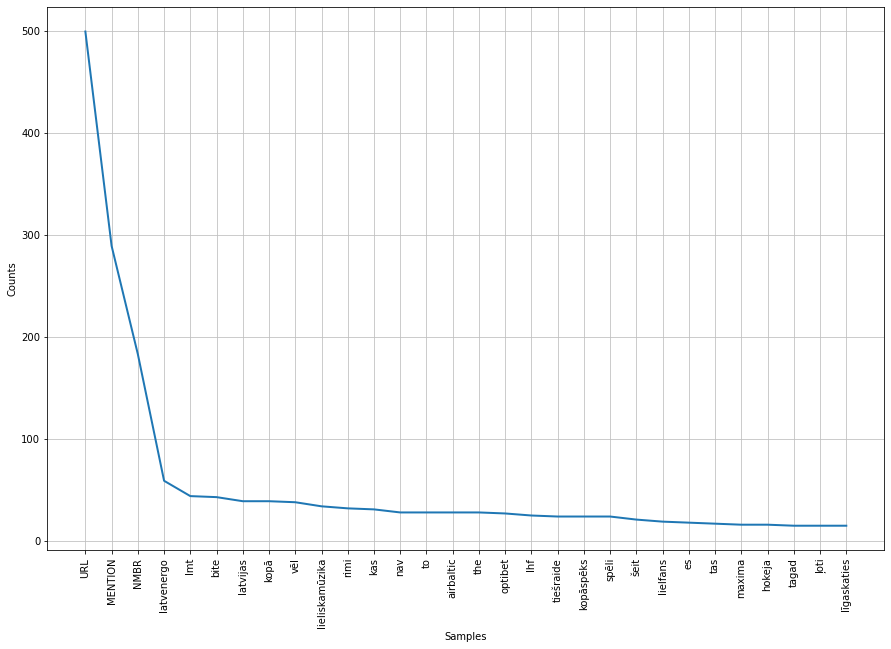

In [170]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
freqWords.plot(30,cumulative=False)
plt.show()

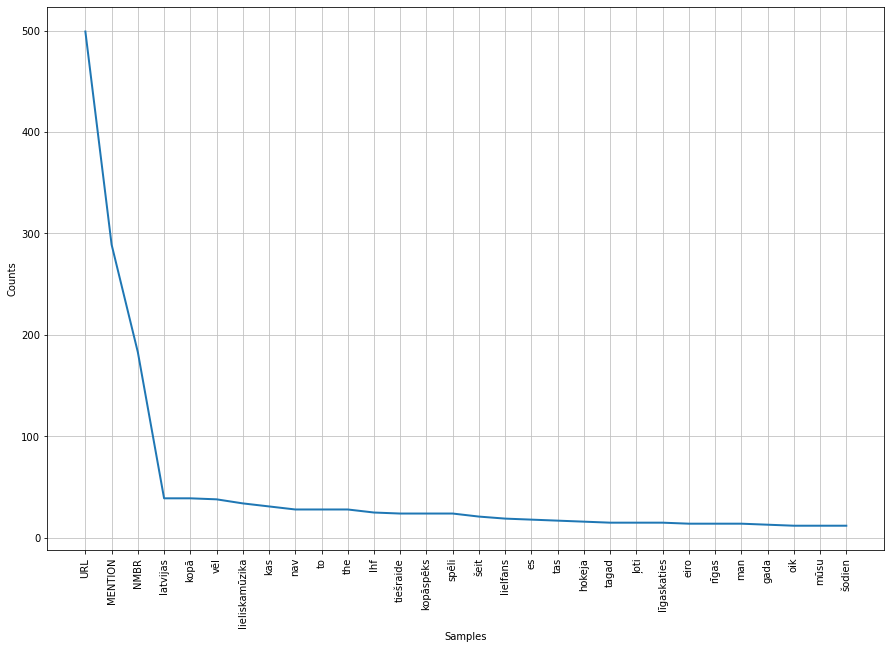

In [171]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
freqWordsWithoutBrands.plot(30,cumulative=False)
plt.show()

# Train

In [185]:
# function to find features in every post
def find_features(post):
    words = word_tokenize(post)
    features = {}
    for word in word_features:
        features[word] = (word in words)
    return features

In [186]:
tweets_all = list(zip(allLabeledTweets.loc[:,"message_no_stopwords"].values,allLabeledTweets.loc[:,"label"].values))

featuresets = [(find_features(text), label) for (text, label) in tweets_all]

from sklearn import model_selection

# split the data into training and testing datasets
seed = 1
training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, random_state=seed)

print(len(allLabeledTweets))
print(len(training))
print(len(testing))

# save testing and training data to file
filename = './data/testing_tweets.data'
pickle.dump(testing, open(filename, 'wb'))

filename = './data/training_tweets.data'
pickle.dump(training, open(filename, 'wb'))

444
333
111


In [187]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define models to train
names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(solver='lbfgs', max_iter=1000),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = zip(names, classifiers)

for name, model in models:
    nltk_model = SklearnClassifier(model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model, testing)*100
    print("{} Accuracy: {}".format(name, accuracy))

K Nearest Neighbors Accuracy: 72.97297297297297
Decision Tree Accuracy: 76.57657657657657
Random Forest Accuracy: 75.67567567567568
Logistic Regression Accuracy: 81.08108108108108
SGD Classifier Accuracy: 75.67567567567568
Naive Bayes Accuracy: 79.27927927927928
SVM Linear Accuracy: 81.08108108108108


In [188]:
# Ensemble methods - Voting classifier
from sklearn.ensemble import VotingClassifier

names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = list(zip(names, classifiers))

nltk_ensemble = SklearnClassifier(VotingClassifier(estimators = models, voting = 'hard', n_jobs = -1))
nltk_ensemble.train(training)
accuracy = nltk.classify.accuracy(nltk_model, testing)*100
print("Voting Classifier: Accuracy: {}".format(accuracy))

Voting Classifier: Accuracy: 81.08108108108108


In [190]:
# make class label prediction for testing set
txt_features, labels = zip(*testing)

prediction = nltk_ensemble.classify_many(txt_features)

# print a confusion matrix and a classification report
print(classification_report(labels, prediction))

pd.DataFrame(
    confusion_matrix(labels, prediction))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        83
           1       0.43      0.25      0.32        12
           2       0.89      0.50      0.64        16

    accuracy                           0.82       111
   macro avg       0.72      0.57      0.62       111
weighted avg       0.80      0.82      0.80       111



,0,1,2
0,80,2,1
1,9,3,0
2,6,2,8


In [193]:
# save the model to disk
filename = './models/model_votingClassifier_with_brands.sav'
pickle.dump(nltk_ensemble, open(filename, 'wb'))

In [194]:
# function to find features in every post
def find_features_no_brands(post):
    words = word_tokenize(post)
    features = {}
    for word in word_features_without_brands:
        features[word] = (word in words)
    return features

tweets_all = list(zip(allLabeledTweets.loc[:,"message_no_stopwords"].values,allLabeledTweets.loc[:,"label"].values))
featuresets = [(find_features_no_brands(text), label) for (text, label) in tweets_all]

from sklearn import model_selection

# split the data into training and testing datasets
seed = 1
training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, random_state=seed)

print(len(allLabeledTweets))
print(len(training))
print(len(testing))

# save testing and training data to file
filename = './data/testing_tweets_no_brands.data'
pickle.dump(testing, open(filename, 'wb'))

filename = './data/training_tweets_no_brands.data'
pickle.dump(training, open(filename, 'wb'))

444
333
111


In [195]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define models to train
names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(solver='lbfgs', max_iter=1000),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = zip(names, classifiers)

for name, model in models:
    nltk_model = SklearnClassifier(model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model, testing)*100
    print("{} Accuracy: {}".format(name, accuracy))

K Nearest Neighbors Accuracy: 71.17117117117117
Decision Tree Accuracy: 77.47747747747748
Random Forest Accuracy: 76.57657657657657
Logistic Regression Accuracy: 76.57657657657657
SGD Classifier Accuracy: 73.87387387387388
Naive Bayes Accuracy: 76.57657657657657
SVM Linear Accuracy: 79.27927927927928


In [196]:
# Ensemble methods - Voting classifier
from sklearn.ensemble import VotingClassifier

names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = list(zip(names, classifiers))

nltk_ensemble = SklearnClassifier(VotingClassifier(estimators = models, voting = 'hard', n_jobs = -1))
nltk_ensemble.train(training)
accuracy = nltk.classify.accuracy(nltk_model, testing)*100
print("Voting Classifier: Accuracy: {}".format(accuracy))

Voting Classifier: Accuracy: 79.27927927927928


In [197]:
# make class label prediction for testing set
txt_features, labels = zip(*testing)

prediction = nltk_ensemble.classify_many(txt_features)

# print a confusion matrix and a classification report
print(classification_report(labels, prediction))

pd.DataFrame(
    confusion_matrix(labels, prediction))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89        83
           1       0.33      0.08      0.13        12
           2       0.83      0.31      0.45        16

    accuracy                           0.79       111
   macro avg       0.66      0.46      0.49       111
weighted avg       0.76      0.79      0.74       111



,0,1,2
0,82,0,1
1,11,1,0
2,9,2,5


In [198]:
# save the model to disk
filename = './models/model_votingClassifier_no_brands.sav'
pickle.dump(nltk_ensemble, open(filename, 'wb'))